In [1]:
from src import simulations, model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

log_theta = pd.read_csv("results/paad/paad_muts_30_5_008_old.csv", index_col=0)
tau1, tau2 = np.exp(log_theta.pop("Sampling").iloc[:2])
events = log_theta.columns
log_theta = log_theta.to_numpy()

In [2]:
data = np.load("simulations/paad_muts_30_5_008_old.npy")

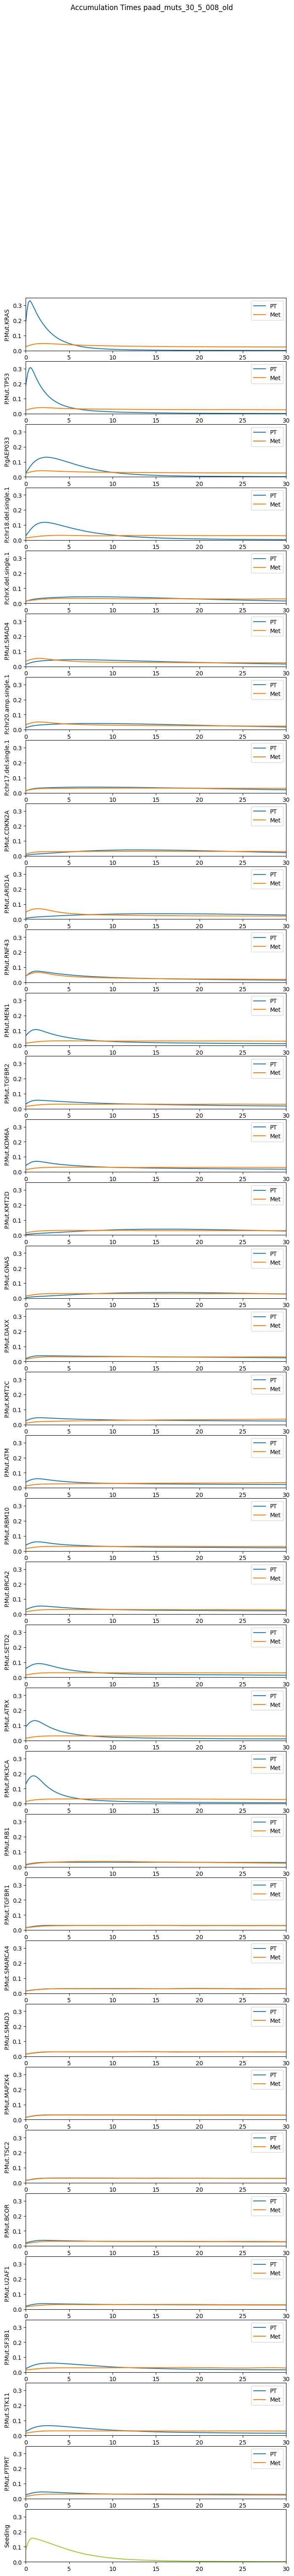

In [3]:
f, a = plt.subplots(log_theta.shape[0], figsize=(8,70))
lim = 30
import seaborn as sns
for i in range(log_theta.shape[0] - 1):
    a[i].set_ylim((0,0.35))
    a[i].set_xlim((0,lim))
    a[i].set_ylabel(events[i])
    sns.kdeplot(np.array(data[:,i][data[:,i] < lim * 1.1]), ax=a[i], label="PT")
    sns.kdeplot(np.array(data[:,i + len(log_theta) - 1][data[:,i + len(log_theta) - 1] < lim * 1.1]), ax=a[i], label="Met")
    a[i].legend()
a[-1].set_ylim((0,0.35))
a[-1].set_xlim((0,lim))
a[-1].set_ylabel(events[-1])
sns.kdeplot(np.array(data[:,-1][data[:,-1] < lim * 1.1]), ax=a[-1], color="yellowgreen")
f.suptitle("Accumulation Times paad_muts_30_5_008_old")
f.savefig(dpi=200, fname="viz/accumulation_times.png")

In [4]:
means = data.mean(axis=0)

In [5]:
metMHN = model.MetMHN(log_theta=log_theta, tau1=tau1, tau2=tau2, events=events)
state = np.zeros(log_theta.shape[0], dtype=int)
state[[1, 2, 3, 4, 5]] = 1
_, order = metMHN.likeliest_order(state, met=False)

In [34]:
# order = np.array([11, 16, 21])
# order = np.array([11, 16, 29])
# order = np.array([
#     5, 
#     0,
#     1,
#     20])
order = np.array([
    5,
    0,
    1,
    7, 2, 3])
events[order]

Index(['P.Mut.SMAD4', 'P.Mut.KRAS', 'P.Mut.TP53', 'P.chr17.del.single.1',
       'P.gAEP033', 'P.chr18.del.single.1'],
      dtype='object')

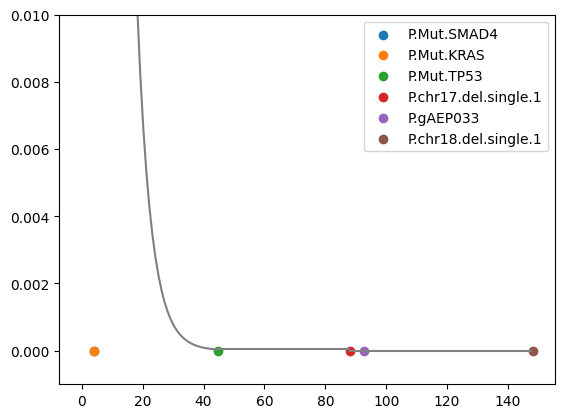

In [35]:
x = np.linspace(0, 5, 100)
rates = np.exp(np.tril(log_theta[np.ix_(order, order)]).sum(axis=0))
times = [(1 / rates[: i + 1]).sum() for i in range(len(order))]
times.append(0)
seeding = log_theta[[-1] + order]
for i, event in enumerate(order):
    plt.scatter(times[i], 0, label=events[event])
for i in range(len(order)):
    x = np.arange(0, 1/rates[i])
    lam = np.exp(seeding[:i].sum())
    plt.plot(x + times[i-1], lam * np.exp(-lam * x), color="grey")
plt.ylim(-0.001,0.01)
plt.legend()